In [2]:
# Importing necessary libraries
import pandas as pd

# Loading the data
# Assuming we start with the Sentences_50Agree.txt file for demonstration purposes
file_path = 'C:/Users/egeme/OneDrive/Masaüstü/NewProjects/NLP/Data/Sentences_AllAgree.txt'


# Reading the data
with open(file_path, 'r', encoding='iso-8859-1') as file:
    lines = file.readlines()

# Splitting sentences and labels based on the "@" delimiter
data = [line.strip().rsplit("@", 1) for line in lines]

# Creating a DataFrame
df = pd.DataFrame(data, columns=["sentence", "label"])

# Displaying basic information about the dataset
print(df.head())  # Displaying the first few rows
print(df.info())  # Displaying information about columns and data types

# Checking the distribution of labels
label_distribution = df['label'].value_counts()
print("Label Distribution:\n", label_distribution)


                                            sentence     label
0  According to Gran , the company has no plans t...   neutral
1  Technopolis plans to develop in stages an area...   neutral
2  The international electronic industry company ...  negative
3  With the new production plant the company woul...  positive
4  According to the company 's updated strategy f...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  4846 non-null   object
 1   label     4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None
Label Distribution:
 label
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64


In [3]:
# Converting all text to lowercase
df['sentence'] = df['sentence'].str.lower()
print(df.head())  # Displaying the first few rows to verify the change


                                            sentence     label
0  according to gran , the company has no plans t...   neutral
1  technopolis plans to develop in stages an area...   neutral
2  the international electronic industry company ...  negative
3  with the new production plant the company woul...  positive
4  according to the company 's updated strategy f...  positive


In [4]:
import re

# Removing punctuation
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
print(df.head())  # Displaying the first few rows to verify the change


                                            sentence     label
0  according to gran  the company has no plans to...   neutral
1  technopolis plans to develop in stages an area...   neutral
2  the international electronic industry company ...  negative
3  with the new production plant the company woul...  positive
4  according to the company s updated strategy fo...  positive


In [6]:
import nltk
from nltk.corpus import stopwords

# Download stop words if not already downloaded
nltk.download('stopwords')

# Defining stop words list
stop_words = set(stopwords.words('english'))

# Removing stop words
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
print(df.head())  # Displaying the first few rows to verify the change


                                            sentence     label
0  according gran company plans move production r...   neutral
1  technopolis plans develop stages area less 100...   neutral
2  international electronic industry company elco...  negative
3  new production plant company would increase ca...  positive
4  according company updated strategy years 20092...  positive


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egeme\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# Download necessary data if not already available
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization function
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print(df.head())  # Displaying the first few rows to verify the change


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\egeme\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\egeme\AppData\Roaming\nltk_data...


                                            sentence     label
0  according gran company plan move production ru...   neutral
1  technopolis plan develop stage area less 10000...   neutral
2  international electronic industry company elco...  negative
3  new production plant company would increase ca...  positive
4  according company updated strategy year 200920...  positive


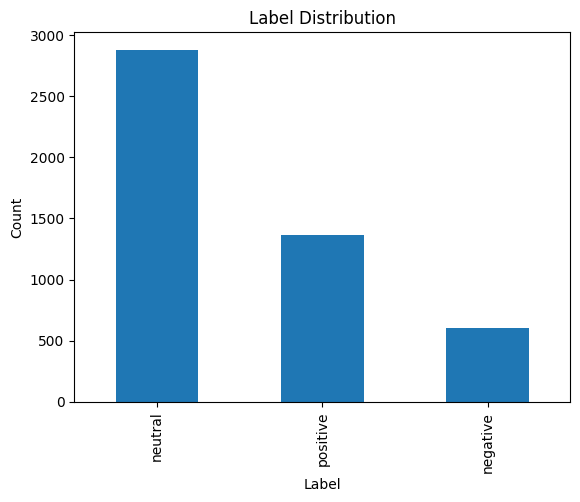

In [8]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Most common words: [('eur', 1015), ('company', 971), ('said', 544), ('mn', 515), ('finnish', 512), ('sale', 501), ('million', 441), ('share', 435), ('profit', 413), ('net', 412), ('service', 339), ('finland', 337), ('group', 327), ('year', 323), ('operating', 299), ('2009', 297), ('mln', 288), ('market', 287), ('business', 286), ('2008', 283)]


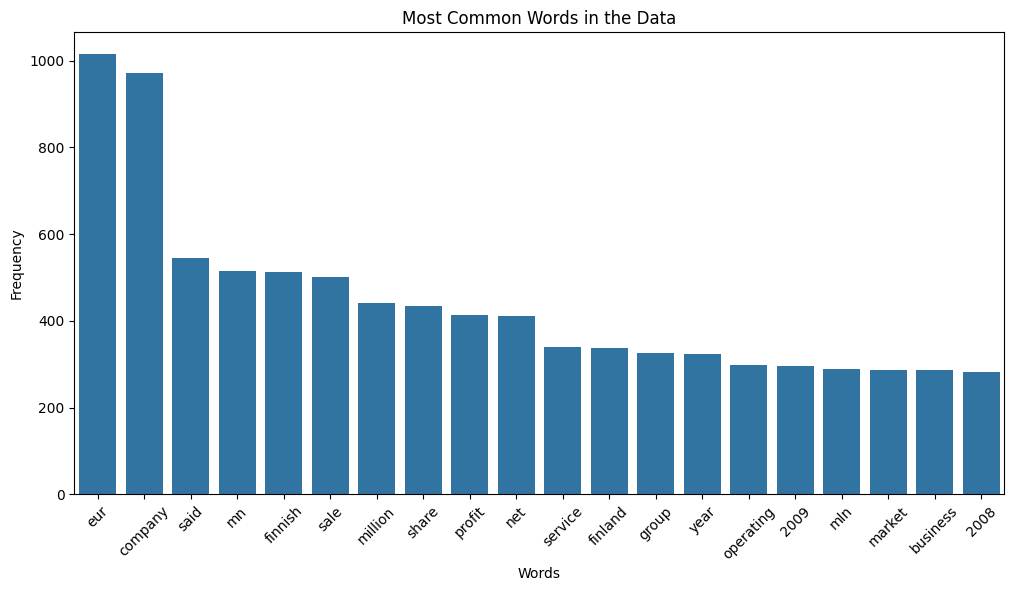

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenizing the sentences into words
all_words = ' '.join(df['sentence']).split()

# Counting the frequency of each word
word_freq = Counter(all_words)

# Displaying the most common words (you can change the number as needed)
most_common_words = word_freq.most_common(20)
print("Most common words:", most_common_words)

# Visualizing the most common words (optional)
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Most Common Words in the Data')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Removing common but less informative words
common_words_to_remove = ['eur', 'company', 'finnish', 'year', 'm', 'mln']  # You can adjust the list as needed
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in common_words_to_remove]))

# Removing duplicates if any
df = df.drop_duplicates()

# Checking for missing or empty values
df = df.dropna()  # Remove rows with missing values
df = df[df['sentence'].str.strip() != '']  # Remove rows with empty sentences

# Display the cleaned data
print(df.head())


                                            sentence     label
0  according gran plan move production russia alt...   neutral
1  technopolis plan develop stage area less 10000...   neutral
2  international electronic industry elcoteq laid...  negative
3  new production plant would increase capacity m...  positive
4  according updated strategy 20092012 basware ta...  positive


In [30]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['sentence'])

# Convert sentences to sequences of tokens
sequences = tokenizer.texts_to_sequences(df['sentence'])

# Pad the sequences to make all sentences the same length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Display tokenizer information
word_index = tokenizer.word_index
print(f"Vocabulary size: {len(word_index)}")
print(f"Padded sequences shape: {padded_sequences.shape}")


Vocabulary size: 10312
Padded sequences shape: (4827, 46)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_tfidf = vectorizer.fit_transform(df['sentence'])

print(f"TF-IDF shape: {X_tfidf.shape}")


TF-IDF shape: (4827, 5000)


In [32]:
from sklearn.model_selection import train_test_split

# Prepare data
X = padded_sequences  # Tokenized and padded sequences
y = df['label']  # Labels

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (3861, 46)
Test data shape: (966, 46)


In [36]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam

vocab_size = len(word_index) + 1  # Vocabulary size
embedding_dim = 128  # Embedding dimension
input_length = max_length  # Length of input sequences
gru_units = 128  # GRU katmanındaki birim sayısı
dense_units = 64  # Dense katmanındaki birim sayısı
learning_rate = 0.001  # Öğrenme oranı
batch_size = 64  # Batch boyutu
epochs = 20  # Epoch sayısı

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=False))  # Daha fazla birim ekledik
model.add(Dense(dense_units, activation='relu'))  # Dense katmanında daha fazla birim ekledik
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

optimizer = Adam(learning_rate=learning_rate)  # Öğrenme oranını belirttik
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5496 - loss: 0.9682 - val_accuracy: 0.6003 - val_loss: 0.9426
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6024 - loss: 0.9307 - val_accuracy: 0.6003 - val_loss: 0.9164
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5842 - loss: 0.9395 - val_accuracy: 0.6003 - val_loss: 0.9165
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5836 - loss: 0.9357 - val_accuracy: 0.6003 - val_loss: 0.9166
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5993 - loss: 0.9210 - val_accuracy: 0.6003 - val_loss: 0.9188
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6054 - loss: 0.9203 - val_accuracy: 0.6003 - val_loss: 0.9190
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5827 - loss: 0.9382 - val_accuracy: 0.6003 - val_loss: 0.9181
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5884 - loss: 0.9295 - val_accuracy: 0.6003 - v

In [166]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data
X = padded_sequences  # Tokenized and padded sequences
y = df['label']  # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Displaying resampled data distribution
from collections import Counter
print(f"Resampled dataset shape: {Counter(y_train_resampled)}")


Resampled dataset shape: Counter({'neutral': 2288, 'negative': 2288, 'positive': 2288})


In [210]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam

vocab_size = len(word_index) + 1  # Vocabulary size
embedding_dim = 256  # Embedding dimension
input_length = max_length  # Length of input sequences
gru_units = 256  # GRU katmanındaki birim sayısı
dense_units = 64  # Dense katmanındaki birim sayısı
learning_rate = 0.005  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 30  # Epoch sayısı

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=False))  # Daha fazla birim ekledik
model.add(Dense(dense_units, activation='relu'))  # Dense katmanında daha fazla birim ekledik
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

optimizer = Adam(learning_rate=learning_rate)  # Öğrenme oranını belirttik
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_123 (Embedding)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_168 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_248 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_249 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.4539 - loss: 1.0275 - val_accuracy: 0.6003 - val_loss: 0.9441
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.5845 - loss: 0.9585 - val_accuracy: 0.6003 - val_loss: 0.9188
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.5934 - loss: 0.9364 - val_accuracy: 0.6003 - val_loss: 0.9195
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.6000 - loss: 0.9252 - val_accuracy: 0.6003 - val_loss: 0.9201
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.5831 - loss: 0.9407 - val_accuracy: 0.6003 - val_loss: 0.9169
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.5923 - loss: 0.9285 - val_accuracy: 0.6003 - val_loss: 0.9243
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.5895 - loss: 0.9375 - val_accuracy: 0.6003 - val_loss: 0.9169
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.5887 - loss: 0.9310 - val_accuracy: 0.

In [212]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model hiperparametreleri
vocab_size = len(word_index) + 1  # Kelime dağarcığı büyüklüğü
embedding_dim = 512  # Gömme boyutu
input_length = max_length  # Giriş dizilerinin uzunluğu
gru_units = 256  # GRU katmanındaki birim sayısı
dense_units = 128  # Dense katmanındaki birim sayısı
learning_rate = 0.005  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 40  # Epoch sayısı

# Modelin oluşturulması
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=True))  # İlk GRU katmanı (daha derin yapı için return_sequences=True)
model.add(Dropout(0.3))  # Dropout eklenmesi
model.add(GRU(gru_units))  # İkinci GRU katmanı
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  # İkinci Dropout katmanı
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

# Modelin derlenmesi
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özeti
model.summary()

# Modelin eğitilmesi
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_124 (Embedding)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_169 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_203 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_170 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_250 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_204 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_251 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 507ms/step - accuracy: 0.4597 - loss: 1.1402 - val_accuracy: 0.6003 - val_loss: 0.9487
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 504ms/step - accuracy: 0.5867 - loss: 0.9683 - val_accuracy: 0.6003 - val_loss: 0.9164
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 511ms/step - accuracy: 0.5837 - loss: 0.9505 - val_accuracy: 0.6003 - val_loss: 0.9670
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 511ms/step - accuracy: 0.5886 - loss: 0.9547 - val_accuracy: 0.6003 - val_loss: 0.9264
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 593ms/step - accuracy: 0.5970 - loss: 0.9341 - val_accuracy: 0.6003 - val_loss: 0.9211
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 968ms/step - accuracy: 0.6113 - loss: 0.9234 - val_accuracy: 0.6003 - val_loss: 0.9282
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6004 - loss: 0.9385 - val_accuracy: 0.6003 - val_loss: 0.9317
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5819 - loss: 0.9482 - val_accuracy: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model hiperparametreleri
vocab_size = len(word_index) + 1  # Kelime dağarcığı büyüklüğü
embedding_dim = 128  # Gömme boyutu
input_length = max_length  # Giriş dizilerinin uzunluğu
gru_units = 128  # GRU katmanındaki birim sayısı
dense_units = 128  # Dense katmanındaki birim sayısı
learning_rate = 0.01  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 30  # Epoch sayısı

# Modelin oluşturulması
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=True))  # İlk GRU katmanı (daha derin yapı için return_sequences=True)
model.add(Dropout(0.3))  # Dropout eklenmesi
model.add(GRU(gru_units))  # İkinci GRU katmanı
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  # İkinci Dropout katmanı
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

# Modelin derlenmesi
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özeti
model.summary()

# Modelin eğitilmesi
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_130 (Embedding)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_179 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_214 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_180 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_262 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_215 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_263 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
20/25 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.4520 - loss: 1.0895

In [216]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model hiperparametreleri
vocab_size = len(word_index) + 1  # Kelime dağarcığı büyüklüğü
embedding_dim = 128  # Gömme boyutu
input_length = max_length  # Giriş dizilerinin uzunluğu
gru_units = 128  # GRU katmanındaki birim sayısı
dense_units = 512  # Dense katmanındaki birim sayısı
learning_rate = 0.01  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 25  # Epoch sayısı

# Modelin oluşturulması
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=True))  # İlk GRU katmanı (daha derin yapı için return_sequences=True)
model.add(Dropout(0.3))  # Dropout eklenmesi
model.add(GRU(gru_units))  # İkinci GRU katmanı
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  # İkinci Dropout katmanı
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

# Modelin derlenmesi
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özeti
model.summary()

# Modelin eğitilmesi
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_126 (Embedding)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_173 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_207 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_174 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_254 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_208 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_255 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 864ms/step - accuracy: 0.4436 - loss: 1.6350 - val_accuracy: 0.6003 - val_loss: 0.9431
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 824ms/step - accuracy: 0.5900 - loss: 0.9601 - val_accuracy: 0.6003 - val_loss: 0.9230
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 688ms/step - accuracy: 0.5885 - loss: 0.9474 - val_accuracy: 0.6003 - val_loss: 0.9105
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - accuracy: 0.6730 - loss: 0.8002 - val_accuracy: 0.6494 - val_loss: 0.9715
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 429ms/step - accuracy: 0.8196 - loss: 0.4954 - val_accuracy: 0.6572 - val_loss: 1.0125
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 411ms/step - accuracy: 0.8608 - loss: 0.3113 - val_accuracy: 0.6106 - val_loss: 1.2568
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 419ms/step - accuracy: 0.8986 - loss: 0.2368 - val_accuracy: 0.6753 - val_loss: 1.3806
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.9448 - loss: 0.1675 - val_accu

In [218]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model hiperparametreleri
vocab_size = len(word_index) + 1  # Kelime dağarcığı büyüklüğü
embedding_dim = 128  # Gömme boyutu
input_length = max_length  # Giriş dizilerinin uzunluğu
gru_units = 128  # GRU katmanındaki birim sayısı
dense_units = 512  # Dense katmanındaki birim sayısı
learning_rate = 0.01  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 25  # Epoch sayısı

# Modelin oluşturulması
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(GRU(gru_units, return_sequences=True))  # İlk GRU katmanı (daha derin yapı için return_sequences=True)
model.add(Dropout(0.3))  # Dropout eklenmesi
model.add(GRU(gru_units))  # İkinci GRU katmanı
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  # İkinci Dropout katmanı
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

# Modelin derlenmesi
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özeti
model.summary()

# Modelin eğitilmesi
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_127 (Embedding)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_175 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_209 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_176 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_210 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_257 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 460ms/step - accuracy: 0.4908 - loss: 1.3947 - val_accuracy: 0.6003 - val_loss: 0.9309
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 421ms/step - accuracy: 0.6025 - loss: 0.9054 - val_accuracy: 0.6248 - val_loss: 0.8114
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 561ms/step - accuracy: 0.7721 - loss: 0.5782 - val_accuracy: 0.6507 - val_loss: 0.8769
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 925ms/step - accuracy: 0.8137 - loss: 0.4197 - val_accuracy: 0.6533 - val_loss: 1.0253
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 954ms/step - accuracy: 0.8598 - loss: 0.3135 - val_accuracy: 0.6572 - val_loss: 1.2909
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 984ms/step - accuracy: 0.8678 - loss: 0.2958 - val_accuracy: 0.6352 - val_loss: 1.4427
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 821ms/step - accuracy: 0.8553 - loss: 0.2936 - val_accuracy: 0.6080 - val_loss: 1.5201
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.9332 - loss: 0.1768 - val_accu

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
              precision    recall  f1-score   support

    Negative       0.42      0.67      0.52       121
     Neutral       0.76      0.73      0.74       572
    Positive       0.55      0.44      0.49       273

    accuracy                           0.64       966
   macro avg       0.57      0.61      0.58       966
weighted avg       0.66      0.64      0.64       966



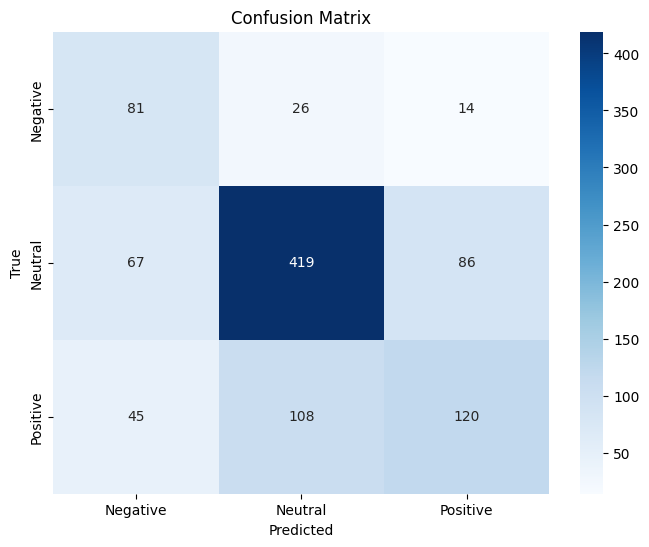

In [220]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Test verileri üzerindeki tahminler
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Sınıf raporu
print(classification_report(y_test_encoded, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))

# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [222]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional, Layer
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

# Attention Layer tanımlaması
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

# Model hiperparametreleri
vocab_size = len(word_index) + 1  # Kelime dağarcığı büyüklüğü
embedding_dim = 128  # Gömme boyutu
input_length = max_length  # Giriş dizilerinin uzunluğu
gru_units = 128  # GRU katmanındaki birim sayısı
dense_units = 512  # Dense katmanındaki birim sayısı
learning_rate = 0.01  # Öğrenme oranı
batch_size = 128  # Batch boyutu
epochs = 25  # Epoch sayısı

# Modelin oluşturulması
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(Bidirectional(GRU(gru_units, return_sequences=True)))  # Bidirectional GRU
model.add(Attention())  # Attention mekanizması
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  # Dropout katmanı
model.add(Dense(3, activation='softmax'))  # 3 sınıf için çıktı katmanı

# Modelin derlenmesi
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özeti
model.summary()

# Modelin eğitilmesi
history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_128 (Embedding)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_15                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_6 (Attention)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_258 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_211 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_259 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 572ms/step - accuracy: 0.5072 - loss: 1.1326 - val_accuracy: 0.6442 - val_loss: 0.7861
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 555ms/step - accuracy: 0.7406 - loss: 0.6078 - val_accuracy: 0.7426 - val_loss: 0.6398
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 564ms/step - accuracy: 0.8958 - loss: 0.2577 - val_accuracy: 0.7283 - val_loss: 0.7395
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 576ms/step - accuracy: 0.9707 - loss: 0.1118 - val_accuracy: 0.7322 - val_loss: 0.9655
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 844ms/step - accuracy: 0.9909 - loss: 0.0380 - val_accuracy: 0.7270 - val_loss: 1.1273
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 517ms/step - accuracy: 0.9939 - loss: 0.0213 - val_accuracy: 0.7141 - val_loss: 1.2811
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 512ms/step - accuracy: 0.9949 - loss: 0.0229 - val_accuracy: 0.7141 - val_loss: 1.4261
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 515ms/step - accuracy: 0.9981 - loss: 0.0079 - val_accu

In [224]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Bidirectional, Dense, Dropout, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight", shape=(input_shape[-1], 1),
                                 initializer="random_normal", trainable=True)
        self.b = self.add_weight(name="attention_bias", shape=(input_shape[1], 1),
                                 initializer="zeros", trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a = tf.nn.softmax(e, axis=1)
        output = tf.reduce_sum(x * a, axis=1)
        return output


vocab_size = len(word_index) + 1  
embedding_dim = 256  
input_length = max_length  
gru_units = 256  
dense_units = 128  
learning_rate = 0.005  
batch_size = 64  
epochs = 30  

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(Bidirectional(GRU(gru_units, return_sequences=True))) 
model.add(Dropout(0.3))  
model.add(Attention())  
model.add(Dense(dense_units, activation='relu'))
model.add(Dropout(0.3))  
model.add(Dense(3, activation='softmax'))  

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_129 (Embedding)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_212 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_7 (Attention)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_260 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_213 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_261 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 553ms/step - accuracy: 0.5462 - loss: 0.9822 - val_accuracy: 0.6766 - val_loss: 0.7738
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 541ms/step - accuracy: 0.7473 - loss: 0.5909 - val_accuracy: 0.7245 - val_loss: 0.6472
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 516ms/step - accuracy: 0.9038 - loss: 0.2684 - val_accuracy: 0.7322 - val_loss: 0.7213
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 519ms/step - accuracy: 0.9609 - loss: 0.1298 - val_accuracy: 0.7374 - val_loss: 0.9137
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 516ms/step - accuracy: 0.9763 - loss: 0.0724 - val_accuracy: 0.7387 - val_loss: 1.1977
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.7182 - loss: 0.7494
Test Accuracy: 72.05%


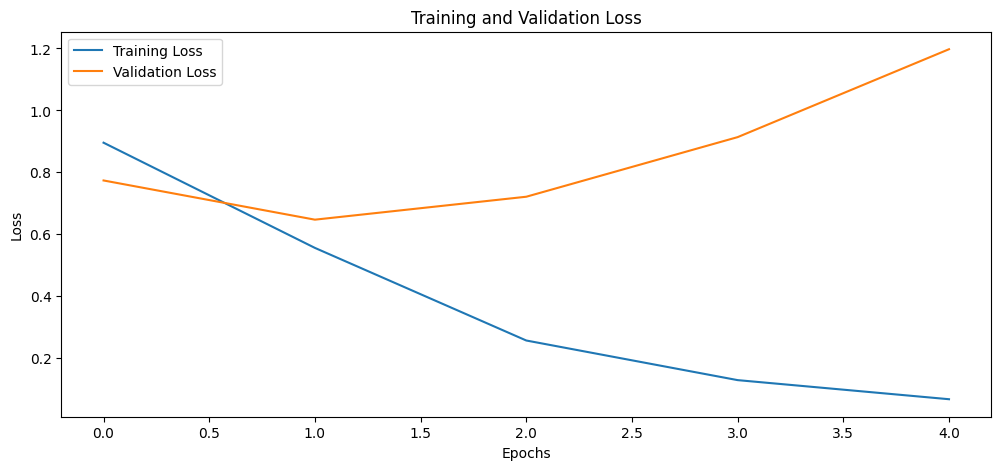

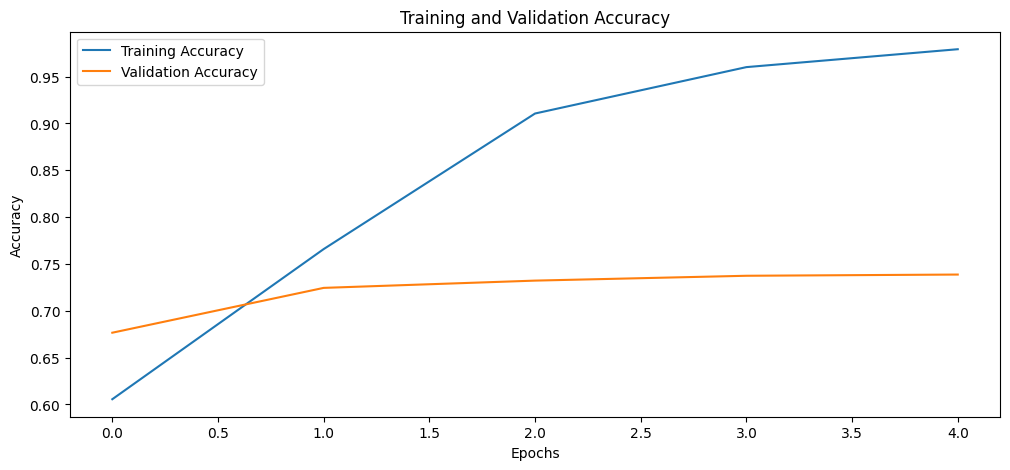

In [226]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybı
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğu
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step
              precision    recall  f1-score   support

    Negative       0.58      0.63      0.60       121
     Neutral       0.79      0.84      0.81       572
    Positive       0.62      0.51      0.56       273

    accuracy                           0.72       966
   macro avg       0.66      0.66      0.66       966
weighted avg       0.71      0.72      0.71       966



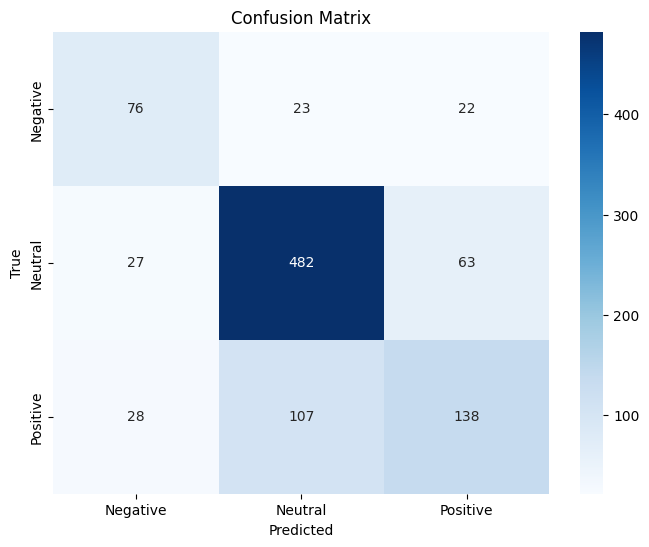

In [228]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Test verileri üzerindeki tahminler
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Sınıf raporu
print(classification_report(y_test_encoded, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))

# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
